# Instalação e teste do *pyserial* com o *Arduino*

### Física Aplicada à Computação 2021-22
#### Nuno Pereira | nuno.pereira@ipbeja.pt | Departamento de Matemática e Ciências Físicas
(v5.0) CC-BY-SA 4.0

### Instalação do *pyserial* para acesso nos *notebooks* do *jupyter*

**Descrição:** lê os dados enviados pelo Arduino até receber *'end'*; pede ao utilizador confirmação para nova leitura ou interrupção da conexão; apresenta contagem do número de leituras. O Arduino deve estar a executar o *sketch* seriArduino_v2.ino (incluído aqui). Neste *sketch* geramos um sinal sinusoidal e uma *time Stamp* associada ao valor enviado.

In [1]:
# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} pyserial

### Verificação de disponibilidade de porto COM

In [2]:
! python -m serial.tools.list_ports

COM3                


1 ports found


### Teste com Arduino

#### Código do Arduino
Criar um *sketch* com o seguinte código:

```c
/* 
 * seriArduino
 * 
 * Versão: 2.0
 * 
 * Fisica Aplicada a Computacao - Engenharia Informatica
 * Departamento de Matematica e Ciencias Fisicas
 * 
 * Ano lectivo 2021-22
 * 
 * Nuno Pereira | nuno.pereira@ipbeja.pt
 * 
 * Hardware: Arduino nano 33 BLE SENSE
 * 
 * Descricao: comunica com PC via Serial Port
 *            dados lidos pelo pySeriArduino_v5
 * 
 * Recursos: -
 * 
 * CC-BY-SA 4.0
 */
#include <Arduino_HTS221.h>
//#define PLOTTER
// prototypes
void writeData(void);

// global variables
int long to;
int long dt = 100; // sampling interval (ms)
int n_samples = 100;
float pi = acos(-1.);
float T = .5; // period (s)
float w = 2.*pi/T; // angular velocity (rad/s)
float A = 2.; // amplitude
char strBuffer[30];

// initialization
void setup() {
  Serial.begin(115200);
  while(!Serial);
}

// main loop
void loop() {
  writeData();
  Serial.println("end");
}

// functions
void writeData()
{
  to = millis();
  for (byte k = 0; k < n_samples; k++)
  {
    delay(10);
    int long t = millis() - to;
    float x = HTS.readTemperature();
#ifdef PLOTTER
    Serial.println(x);
#else    
    sprintf(strBuffer,"%d,%.6f", t, x);
    Serial.println(strBuffer);
#endif
  }
}
```

Depois de fazer o *upload* do *sketch* para o Arduino e voltar a seleccionar o *serial port*, correr o seguinte código:

In [3]:
import serial

ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM3'
ser.timeout = 2000

# a linha seguinte mostra a informação sobre a conexão sem formatação
#print(ser)

print('Informação sobre a conexão:\n')
print("Connected to serial port" + ser.portstr)
print('Port configuration:\n\tBaudrate: {0}\n\tParity Bits: {1}\n\tByte size: {2}\n\tStop bits: {3}:\n\tTimeout: {4}'.
      format(ser.baudrate, ser.parity, ser.bytesize, ser.stopbits, ser.timeout))
ser.open()

print("Is serial port open?", ser.is_open)

Informação sobre a conexão:

Connected to serial portCOM3
Port configuration:
	Baudrate: 115200
	Parity Bits: N
	Byte size: 8
	Stop bits: 1:
	Timeout: 2000
Is serial port open? True


In [4]:
if not ser.is_open:
    ser.open()

count = 0
timeStamp = []  # lista com a etiqueta de tempo
data = []       # lista com as leituras do sensor

while True:
    s = str(ser.readline())
    
    val = s[2:-5]
    
    if ( val == "end" ):
        print("\nTerminou a série de dados.")
        s = input('Ler nova série [S/N]:').upper()
        count = 0
        
        if s == 'N':
            ser.close()
            print('Conexão fechada')
            break
    else:
        sep = val.find(",")
        timeStamp.append(float(val[:sep]))
        data.append(float(val[sep+1:]))
        
        print(count,"\t", timeStamp[count], "\t", data[count])
        count += 1
          






0 	 100.0 	 24.393118
1 	 202.0 	 24.883236
2 	 304.0 	 24.902086
3 	 406.0 	 24.864386
4 	 508.0 	 24.902086
5 	 610.0 	 24.883236
6 	 712.0 	 24.920937
7 	 814.0 	 24.958639
8 	 916.0 	 24.939789
9 	 1018.0 	 24.958639
10 	 1120.0 	 24.883236
11 	 1222.0 	 24.958639
12 	 1324.0 	 24.939789
13 	 1426.0 	 24.939789
14 	 1528.0 	 24.939789
15 	 1630.0 	 24.939789
16 	 1732.0 	 24.958639
17 	 1834.0 	 24.977489
18 	 1936.0 	 24.977489
19 	 2038.0 	 24.977489
20 	 2140.0 	 24.958639
21 	 2242.0 	 24.939789
22 	 2344.0 	 24.939789
23 	 2446.0 	 24.958639
24 	 2548.0 	 24.99634
25 	 2650.0 	 24.958639
26 	 2752.0 	 24.977489
27 	 2854.0 	 24.977489
28 	 2956.0 	 24.977489
29 	 3058.0 	 24.958639
30 	 3160.0 	 24.99634
31 	 3262.0 	 24.977489
32 	 3364.0 	 24.99634
33 	 3466.0 	 25.01519
34 	 3568.0 	 24.977489
35 	 3670.0 	 24.99634
36 	 3772.0 	 25.01519
37 	 3874.0 	 24.99634
38 	 3976.0 	 25.01519
39 	 4078.0 	 24.99634
40 	 4180.0 	 25.03404
41 	 4282.0 	 25.03404
42 	 4384.0 	 25.01519

### Visualização gráfica dos dados

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
t = np.array(timeStamp)
x = np.array(data)
value = np.max(data)
value2 = np.min(data)
value3 = np.mean(data)
value4 = np.std(data) 

Máximo:  25.109444
Minimo:  24.393118
Média:  25.00689637
Desvio padrão 0.08226846391451045


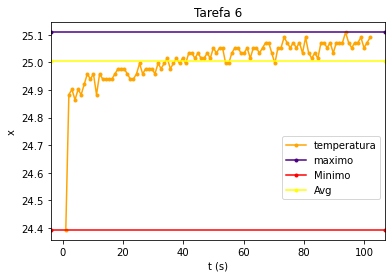

In [7]:
plt.title('Tarefa 6')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.plot(t/100, x, marker='.', linestyle='-', color='orange')
plt.axhline(value, marker='.', linestyle='-', color='#4b0082')
plt.axhline(value2, marker='.', linestyle='-', color='red')
plt.axhline(value3, marker='.', linestyle='-', color='yellow')
plt.legend(["temperatura", "maximo", "Minimo", "Avg", "Desvio-Padrao"] , loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
print("Máximo: ",value)
print("Minimo: ",value2)
print("Média: ",value3)
print("Desvio padrão",value4)
